In [1]:
%pip install pandas
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/df/92/a3fa053c74198f9f0224b2c04dc74f41d2e14e30329c082f7a657f9ca4c5/pandas-2.1.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy<2,>=1.26.0 from https://files.pythonhosted.org/packages/28/75/3b679b41713bb60e2e8f6e2f87be72c971c9e718b1c17b8f8749240ddca8/numpy-1.26.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB ? eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.5 MB 30.4 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/71/00/46562cbdf644aeaa20666d920e2d6b71a0096ff987ef878ec510e4c1d886/fonttools-4.45.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     ---------------------------------------- 158.4/158.4 kB ? eta 0:

In [2]:
plt.rc("font", family = "malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

### 수행준비

In [4]:
f=open("./20231130/weather.csv", encoding="cp949")
data=csv.reader(f)
header=next(data)
data=list(data)
print(len(data))
print(header)
print()
print(data[0])
print(data[1])
print(data[2])

35651
['일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']

['1921-01-01', '2.3', '5.2', '-0.4']
['1921-01-02', '-3.4', '1.5', '-5.8']
['1921-01-03', '-6.5', '-2.7', '-9.5']


In [12]:
max_temp = -999
max_date = ""

for row in data:
    if row[2] and float(row[2])>max_temp:
        max_temp=float(row[2])
        max_date=row[0]
print(f"기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 {max_date} 로 {max_temp} 도이다.")

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 2018-08-01 로 39.6 도이다.


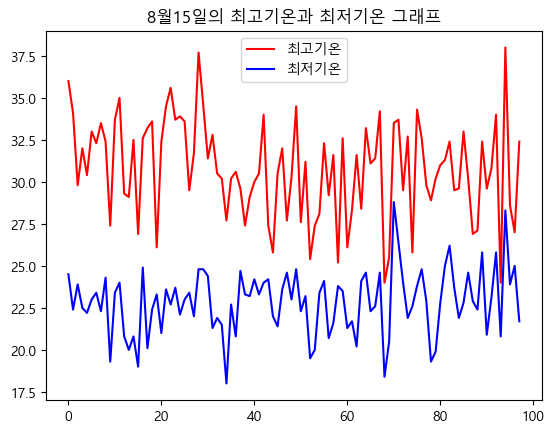

In [18]:
high = []
low = []
for row in data:
    if "08-15" in row[0]:
        if row[2]:
            high.append(float(row[2]))
        if row[3]:
            low.append(float(row[3]))
plt.title("8월15일의 최고기온과 최저기온 그래프")
plt.plot(high, color="red", label="최고기온")
plt.plot(low, color="blue", label="최저기온")
plt.legend()
plt.show()

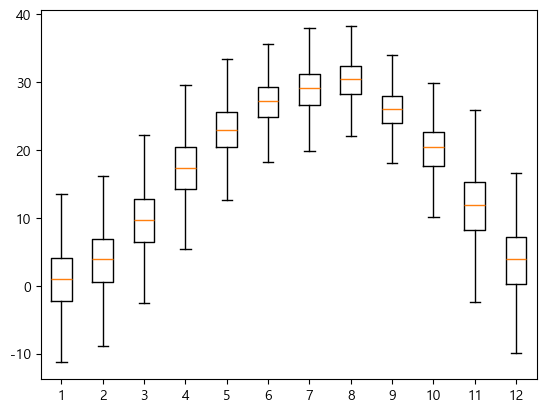

In [24]:
month=[[] for i in range(12)]
for row in data:
    if row[2]:
        month[int(row[0].split('-')[1])-1].append(float(row[2]))
plt.boxplot(month, showfliers=False)
plt.show()

In [46]:
data=open("train.csv", encoding="cp949")
header=next(data)
data=list(data)
dataa=pd.read_csv("./20231130/train.csv")
dataa.info()
print(data[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n', '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n', '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'

{'생존 남성': 0, '사망 남성': 0, '생존 여성': 802, '사망 여성': 89}


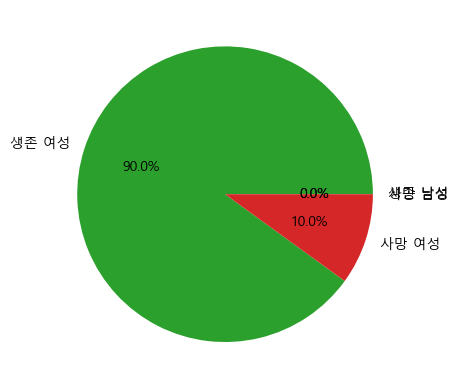

In [51]:
SBG = {"생존 남성": 0, "사망 남성": 0, "생존 여성": 0, "사망 여성": 0}
for row in data:
    if row[4] and row[1]:
        if row[4] == "male":
            if row[1] == '0':
                SBG["사망 남성"] += 1
            else:
                SBG["생존 남성"] += 1
        else:
            if row[1] == '0':
                SBG["사망 여성"] += 1
            else:
                SBG["생존 여성"] += 1        
print(SBG)
plt.pie(SBG.values(), labels=SBG.keys(), autopct="%.1f%%")
plt.show()

[8, 76, 8, 71, 73, 655]


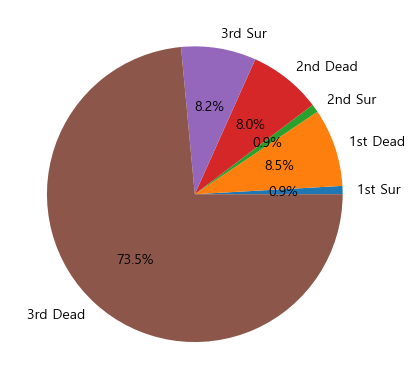

In [55]:
Ticket = ["1st Sur", "1st Dead", "2nd Sur", "2nd Dead", "3rd Sur", "3rd Dead"]
corre = [0,0,0,0,0,0]
for row in data:
    if row[2] == '1':
        if row[1] == '1':
            corre[0]+=1
        else:
            corre[1]+=1
    elif row[2] == '2':
        if row[1] == '1':
            corre[2]+=1
        else:
            corre[3]+=1
    else:
        if row[1] == '1':
            corre[4]+=1
        else:
            corre[5]+=1
print(corre)

plt.pie(corre, labels=Ticket, autopct="%.1f%%")
plt.show()

### 수업

In [57]:
f=open("population.csv", encoding="cp949")
data = csv.reader(f)
header = next(data)
data = list(data)
f.close()
data=list(data)

print(header[:10])
print(len(header))

['행정구역', '2022년08월_계_총인구수', '2022년08월_계_0세', '2022년08월_계_1세', '2022년08월_계_2세', '2022년08월_계_3세', '2022년08월_계_4세', '2022년08월_계_5세', '2022년08월_계_6세', '2022년08월_계_7세']
307


In [59]:
print(header[2], header[102])
print(header[104], header[204])
print(header[206], header[306])

2022년08월_계_0세 2022년08월_계_100세 이상
2022년08월_남_0세 2022년08월_남_100세 이상
2022년08월_여_0세 2022년08월_여_100세 이상


In [61]:
#서울특별시의 연령별 총인구
print(data[0][2:103])
print(len(data[0][2:103]))

['40,931', '44,731', '45,511', '49,245', '52,278', '57,054', '64,993', '67,389', '66,458', '69,728', '73,178', '74,211', '70,537', '70,854', '77,007', '76,198', '71,798', '72,776', '81,292', '84,479', '92,605', '109,564', '122,792', '128,581', '140,859', '151,748', '160,960', '163,689', '168,698', '171,640', '169,823', '155,282', '148,124', '142,339', '134,772', '132,666', '132,963', '131,530', '136,684', '145,139', '153,385', '154,158', '153,713', '142,498', '133,753', '136,239', '134,513', '143,303', '155,439', '158,351', '161,030', '169,789', '159,870', '162,879', '151,879', '141,272', '138,092', '141,719', '132,797', '146,195', '136,622', '157,609', '153,686', '140,019', '132,035', '130,199', '120,257', '125,862', '102,156', '95,014', '96,639', '72,168', '81,170', '79,765', '78,781', '77,931', '55,964', '58,999', '55,081', '57,654', '58,697', '46,452', '40,065', '37,030', '31,920', '27,601', '23,645', '20,122', '15,883', '12,847', '10,513', '7,820', '6,636', '5,631', '4,113', '2,99

In [62]:
#서울특별시의 연령별 남성 인구
print(data[0][104:205])
print(len(data[0][104:205]))

['21,115', '23,013', '23,458', '25,684', '26,926', '29,115', '33,125', '34,405', '34,172', '35,784', '37,526', '38,155', '36,187', '36,346', '39,714', '39,133', '36,951', '37,434', '41,351', '41,960', '44,702', '52,235', '58,066', '60,160', '65,275', '70,459', '76,652', '79,900', '83,359', '85,408', '84,233', '77,554', '74,448', '71,598', '67,149', '66,039', '66,334', '65,641', '68,565', '72,411', '76,366', '77,515', '75,788', '70,255', '65,891', '67,067', '66,636', '70,769', '76,959', '77,814', '80,135', '84,265', '79,074', '80,112', '74,196', '69,027', '68,882', '69,159', '64,909', '72,003', '66,886', '74,936', '72,363', '66,680', '62,926', '61,067', '56,352', '58,313', '47,491', '44,195', '45,083', '33,318', '37,358', '36,292', '35,845', '35,025', '24,977', '26,545', '24,217', '25,689', '25,859', '20,153', '16,759', '15,117', '12,678', '10,397', '8,569', '6,954', '5,131', '3,951', '3,145', '2,102', '1,649', '1,474', '978', '664', '392', '301', '240', '246', '414']
101


In [63]:
#서울특별시의 연령별 여성 인구
print(data[0][206:307])
print(len(data[0][206:307]))

['19,816', '21,718', '22,053', '23,561', '25,352', '27,939', '31,868', '32,984', '32,286', '33,944', '35,652', '36,056', '34,350', '34,508', '37,293', '37,065', '34,847', '35,342', '39,941', '42,519', '47,903', '57,329', '64,726', '68,421', '75,584', '81,289', '84,308', '83,789', '85,339', '86,232', '85,590', '77,728', '73,676', '70,741', '67,623', '66,627', '66,629', '65,889', '68,119', '72,728', '77,019', '76,643', '77,925', '72,243', '67,862', '69,172', '67,877', '72,534', '78,480', '80,537', '80,895', '85,524', '80,796', '82,767', '77,683', '72,245', '69,210', '72,560', '67,888', '74,192', '69,736', '82,673', '81,323', '73,339', '69,109', '69,132', '63,905', '67,549', '54,665', '50,819', '51,556', '38,850', '43,812', '43,473', '42,936', '42,906', '30,987', '32,454', '30,864', '31,965', '32,838', '26,299', '23,306', '21,913', '19,242', '17,204', '15,076', '13,168', '10,752', '8,896', '7,368', '5,718', '4,987', '4,157', '3,135', '2,326', '1,504', '1,032', '773', '704', '1,292']
101


In [65]:
for row in data:
    if "강남구" in row[0]:
        print(row[2:103])

['1,926', '2,202', '2,262', '2,531', '2,843', '3,268', '3,860', '4,356', '4,725', '5,199', '5,578', '5,964', '5,887', '6,028', '6,617', '6,342', '5,785', '5,735', '6,162', '5,786', '5,539', '6,101', '6,376', '6,122', '6,808', '6,939', '7,463', '7,633', '8,076', '8,474', '8,304', '7,964', '7,647', '7,542', '7,051', '7,140', '7,145', '7,278', '7,794', '8,352', '9,097', '9,635', '9,880', '9,708', '9,317', '9,560', '9,519', '9,884', '10,239', '10,221', '10,401', '10,539', '9,896', '9,154', '8,169', '7,345', '7,018', '7,039', '6,698', '6,955', '6,166', '6,818', '6,813', '6,297', '6,349', '6,387', '5,925', '6,283', '5,236', '5,065', '5,018', '3,599', '4,168', '4,181', '4,118', '4,043', '3,041', '2,925', '2,660', '2,560', '2,475', '2,041', '1,692', '1,515', '1,419', '1,141', '993', '880', '687', '565', '528', '389', '349', '284', '222', '175', '121', '86', '54', '50', '104']


[1926, 2202, 2262, 2531, 2843, 3268, 3860, 4356, 4725, 5199, 5578, 5964, 5887, 6028, 6617, 6342, 5785, 5735, 6162, 5786, 5539, 6101, 6376, 6122, 6808, 6939, 7463, 7633, 8076, 8474, 8304, 7964, 7647, 7542, 7051, 7140, 7145, 7278, 7794, 8352, 9097, 9635, 9880, 9708, 9317, 9560, 9519, 9884, 10239, 10221, 10401, 10539, 9896, 9154, 8169, 7345, 7018, 7039, 6698, 6955, 6166, 6818, 6813, 6297, 6349, 6387, 5925, 6283, 5236, 5065, 5018, 3599, 4168, 4181, 4118, 4043, 3041, 2925, 2660, 2560, 2475, 2041, 1692, 1515, 1419, 1141, 993, 880, 687, 565, 528, 389, 349, 284, 222, 175, 121, 86, 54, 50, 104]


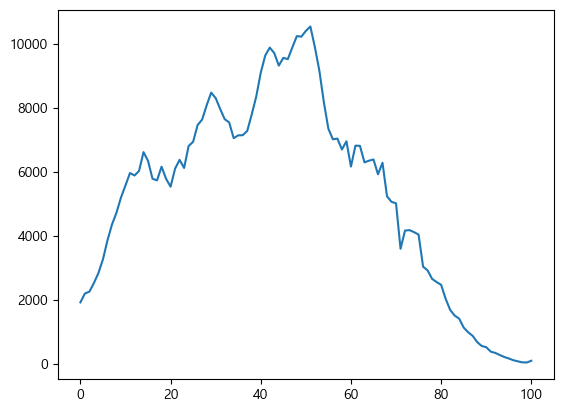

In [67]:
result = []
for row in data:
    if "강남구" in row[0]:
        for i in row[2:103]:
            result.append(int(i.replace(',', '')))
print(result)
plt.plot(result)
plt.show()

#### 예외처리를 한다면?

[1926, 2202, 2262, 2531, 2843, 3268, 3860, 4356, 4725, 5199, 5578, 5964, 5887, 6028, 6617, 6342, 5785, 5735, 6162, 5786, 5539, 6101, 6376, 6122, 6808, 6939, 7463, 7633, 8076, 8474, 8304, 7964, 7647, 7542, 7051, 7140, 7145, 7278, 7794, 8352, 9097, 9635, 9880, 9708, 9317, 9560, 9519, 9884, 10239, 10221, 10401, 10539, 9896, 9154, 8169, 7345, 7018, 7039, 6698, 6955, 6166, 6818, 6813, 6297, 6349, 6387, 5925, 6283, 5236, 5065, 5018, 3599, 4168, 4181, 4118, 4043, 3041, 2925, 2660, 2560, 2475, 2041, 1692, 1515, 1419, 1141, 993, 880, 687, 565, 528, 389, 349, 284, 222, 175, 121, 86, 54, 50, 104]
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seabor

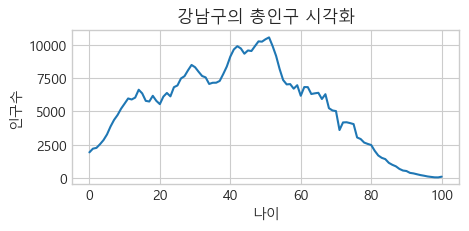

In [77]:
result = []
for row in data:
    if "강남구" in row[0]:
        for i in row[2:103]:
            try:
                result.append(int(i))
            except:
                result.append(int(''.join(i.split(','))))
print(result)
plt.figure(figsize=(5, 2))
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc("font", family = "malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False
plt.title("강남구의 총인구 시각화")
print(plt.style.available)
plt.plot(result)
plt.xlabel("나이")
plt.ylabel("인구수")
plt.show()

In [78]:
def population(tstr):  
    import matplotlib.pyplot as plt
    import pandas as pd
    import csv
    f=open("population.csv", encoding="cp949")
    data = csv.reader(f)
    header = next(data)
    data = list(data)
    f.close()
    data=list(data)
    result = []
    for row in data:
        if tstr in row[0]:
            for i in row[2:103]:
                try:
                    result.append(int(i))
                except:
                    result.append(int(''.join(i.split(','))))
    print(result)
    plt.figure(figsize=(5, 2))
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rc("font", family = "malgun Gothic")
    plt.rcParams["axes.unicode_minus"] = False
    plt.title(f"{tstr}의 총인구 시각화")
    print(plt.style.available)
    plt.plot(result)
    plt.xlabel("나이")
    plt.ylabel("인구수")
    plt.show()

[1657, 1754, 1749, 1788, 1875, 1958, 1955, 2043, 1866, 1883, 1920, 1812, 1614, 1634, 1884, 1822, 1797, 1809, 2134, 2371, 2724, 3370, 3776, 4025, 4434, 4633, 5055, 4921, 4876, 5006, 5021, 4614, 4638, 4499, 4461, 4441, 4517, 4466, 4591, 4735, 4858, 4785, 4613, 4149, 3789, 3897, 3786, 3957, 4391, 4479, 4558, 5052, 4824, 4961, 4615, 4315, 4208, 4388, 4108, 4568, 4287, 4794, 4652, 4136, 3954, 3877, 3413, 3542, 2863, 2578, 2578, 2063, 2289, 2150, 2177, 2259, 1626, 1704, 1617, 1782, 1756, 1419, 1211, 1133, 1018, 856, 727, 590, 508, 372, 280, 236, 190, 159, 113, 85, 42, 34, 28, 23, 53]
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-p

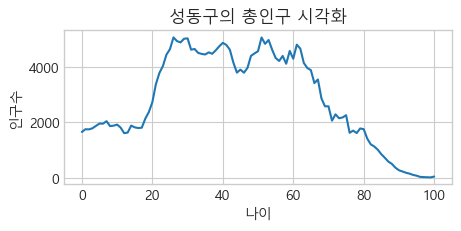

In [79]:
population("성동구")